In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
!pip install transformers

In [49]:
!nvidia-smi

Sat Jun 14 17:11:39 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   31C    P0             46W /  400W |    1539MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [50]:
from transformers import AutoTokenizer, AutoModelForMaskedLM

# Carregar o modelo xlm-roberta-base
model = AutoModelForMaskedLM.from_pretrained("xlm-roberta-base")

# Calcular o número total de parâmetros
total_params = sum(p.numel() for p in model.parameters())
print(f"Total de parâmetros no xlm-roberta-base: {total_params}")

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing XLMRobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Total de parâmetros no xlm-roberta-base: 278295186


In [51]:
# Número de camadas ocultas no xlm-roberta-base
hidden_layers = model.config.num_hidden_layers
print(f"Número de camadas ocultas no xlm-roberta-base: {hidden_layers}")

Número de camadas ocultas no xlm-roberta-base: 12


In [52]:
# Carregar o modelo xlm-roberta-base
model = AutoModelForMaskedLM.from_pretrained("xlm-roberta-base")

# Imprimir a configuração do modelo
print(model.config)

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing XLMRobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


XLMRobertaConfig {
  "architectures": [
    "XLMRobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "xlm-roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "torch_dtype": "float32",
  "transformers_version": "4.52.4",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 250002
}



In [53]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Defesa final/Modelos BERT/FacebookAI xlm-roberta-base/Dados/dataset-petitions-legal-br.csv')

In [54]:
# Exibir a forma (shape) do DataFrame
df.shape

(3458, 3)

In [55]:
# Exibir as 10 primeiras linhas do DataFrame
df.head(10)

,facts,issue_area,issue_area_label
0,juizo vara execucao penas medidas alternativas...,EXTINCAO-DE-PUNIBILIDADE,10
1,juizo vara execucao penal comarca goiniago PRO...,EXTINCAO-DE-PUNIBILIDADE,10
2,juizo vara execucao meio aberto penas medidas ...,EXTINCAO-DE-PUNIBILIDADE,10
3,juizo vara execucao penas medidas alternativas...,EXTINCAO-DE-PUNIBILIDADE,10
4,juizo vara execucao penas medidas alternativas...,EXTINCAO-DE-PUNIBILIDADE,10
5,juizo vara execucao penas medidas alternativas...,EXTINCAO-DE-PUNIBILIDADE,10
6,juizo vara execucao penal comarca goiniago PRO...,EXTINCAO-DE-PUNIBILIDADE,10
7,juizo vara execucao penas medidas alternativas...,EXTINCAO-DE-PUNIBILIDADE,10
8,juizo vara execucao penal comarca goiniago PRO...,EXTINCAO-DE-PUNIBILIDADE,10
9,juizo vara execucao penas medidas alternativas...,EXTINCAO-DE-PUNIBILIDADE,10


In [56]:
# Contar o número de ocorrências de cada classe
label_counts = pd.DataFrame(df['issue_area'].value_counts())
label_counts

,count
issue_area,
EXTINCAO-DE-PUNIBILIDADE,500
AGRAVO,441
IMPUGNACAO,425
EMBARGOS,304
APELACAO,296
REGISTRO-CIVIL,236
LIVRAMENTO-CONDICIONAL,218
INDULTO-COMUTACAO,170
CUMPRIMENTO-DE-SETENCA,150


In [57]:
# Reorganizar os rótulos das categorias (label_values) com base na contagem de categoris na coluna 'issue_area_label'
# Isso garante que as classes mais frequentes apareçam primeiro na lista label_values, facilitando a visualização e interpretação dos resultados
label_values = list(label_counts.index)
order = list(pd.DataFrame(df['issue_area_label'].value_counts()).index)
label_values = [l for _,l in sorted(zip(order, label_values))]

label_values

['AGRAVO',
 'ALVARA-JUDICIAL-LIBERACAO-DE-CORPO',
 'APELACAO',
 'CONSIGNACAO-EM-PAGAMENTO',
 'CONTRARRAZOES-AO-AGRAVO',
 'CUMPRIMENTO-DE-SETENCA',
 'DISSOLUCAO-DE-CONDOMINIO',
 'EMBARGOS',
 'EXCECAO-DE-PRE-EXECUTIVIDADE',
 'EXTINCAO-DE-PUNIBILIDADE',
 'HABEAS-CORPUS',
 'IMPUGNACAO',
 'INDENIZATORIAS',
 'INDULTO-COMUTACAO',
 'INTIMACAO-NEGATIVA',
 'LIVRAMENTO-CONDICIONAL',
 'OFICIOS',
 'PROGRESSAO-DE-REGIME',
 'REGISTRO-CIVIL',
 'REMICAO-DE-PENA',
 'SAIDA-TEMPORARIA',
 'TRANSFERENCIA-DE-EXECUCAO',
 'UNIFICACAO-DE-PENAS',
 'USUCAPIAO']

In [58]:
# Extrair os textos e rótulos das classes do DataFrame
# texts contém os textos da coluna 'facts', e labels contém os rótulos numéricos da coluna 'issue_area_label'
texts = df['facts'].values
labels = df['issue_area_label'].values

In [59]:
# Calcular e exibir estatísticas de comprimento dos textos em número de palavras
text_lengths = [len(texts[i].split()) for i in range(len(texts))]
print("Menor comprimento de texto:", min(text_lengths))
print("Maior comprimento de texto:", max(text_lengths))

Menor comprimento de texto: 16
Maior comprimento de texto: 3996


In [60]:
# Contar o número de textos com comprimento maior ou igual a 512 palavras
sum([1 for i in range(len(text_lengths)) if text_lengths[i] >= 512])

2107

In [61]:
from transformers import AutoTokenizer, AutoModelForMaskedLM

# Tokenizer com xlm-roberta-base
tokenizer = AutoTokenizer.from_pretrained('xlm-roberta-base', do_lower_case=True)

print('Texto original: ', texts[0], '\n')
print('Texto tokenizado: ', tokenizer.tokenize(texts[0]), '\n')
print('IDs de token: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(texts[0])))

class_statistics = {}

# Loop sobre cada classe
for label_value in label_values:
    # Filtra o DataFrame para textos da classe atual
    class_texts = df[df['issue_area'] == label_value]['facts'].values

    # Inicializa listas para armazenar estatísticas por texto
    class_text_lengths = []
    class_token_counts = []

    # Loop sobre cada texto na classe
    for text in class_texts:
        # Tokenize o texto
        tokens = tokenizer.tokenize(text)

        # Armazena o comprimento do texto em palavras
        class_text_lengths.append(len(text.split()))

        # Armazena o número de tokens no texto
        class_token_counts.append(len(tokens))

    # Armazena estatísticas por classe no dicionário
    class_statistics[label_value] = {
        'num_texts': len(class_texts),
        'avg_text_length': sum(class_text_lengths) / len(class_text_lengths),
        'avg_token_count': sum(class_token_counts) / len(class_token_counts)
    }

Texto original:  juizo vara execucao penas medidas alternativas comarca goiniago PROCESSO PROCESSOANONIMIZADO APENADO APENADOANONIMIZADO willian alves pereira defensoria publica estado goias agente signataria uso atribuicoes legais defesa direitos max willian alves pereira ja qualificado auto epigrafe vem requerer extincao punibilidade SENTENCIADO SENTENCIADOANONIMIZADO razoes seguir delineadas APENADO APENADOANONIMIZADO primario condenado pena privativa liberdade fixada ano reclusao infracao art codigo penal substituida pena restritiva direitos modalidade prestacao servicos comunidade extraise relatorio penas medidas alternativas inserido movimentacao n APENADO APENADOANONIMIZADO prestou horas servico comunidade horas estipuladas restando assim horas serem cumpridas ademais partir historico processual PROCESSADO PROCESSADOANONIMIZADO possivel notar cumprimento condicoes impostas sempre deu forma regular comprometimento execucao pena neste sentido considerando medium horas mensais pres

Token indices sequence length is longer than the specified maximum sequence length for this model (1140 > 512). Running this sequence through the model will result in indexing errors


Texto tokenizado:  ['▁ju', 'izo', '▁vara', '▁exe', 'cu', 'cao', '▁pena', 's', '▁medidas', '▁alternativas', '▁comarca', '▁go', 'ini', 'ago', '▁PROCES', 'SO', '▁PROCES', 'SO', 'ANO', 'NIM', 'IZ', 'ADO', '▁A', 'PEN', 'ADO', '▁A', 'PEN', 'ADO', 'ANO', 'NIM', 'IZ', 'ADO', '▁will', 'ian', '▁al', 'ves', '▁per', 'eira', '▁defensor', 'ia', '▁publica', '▁estado', '▁go', 'ias', '▁agente', '▁signat', 'aria', '▁uso', '▁atribui', 'co', 'es', '▁legais', '▁defesa', '▁direitos', '▁max', '▁will', 'ian', '▁al', 'ves', '▁per', 'eira', '▁ja', '▁qualifica', 'do', '▁auto', '▁epi', 'graf', 'e', '▁vem', '▁requer', 'er', '▁ex', 'tin', 'cao', '▁pun', 'i', 'bilidade', '▁S', 'ENT', 'ENCIA', 'DO', '▁S', 'ENT', 'ENCIA', 'DO', 'ANO', 'NIM', 'IZ', 'ADO', '▁raz', 'o', 'es', '▁seguir', '▁de', 'line', 'adas', '▁A', 'PEN', 'ADO', '▁A', 'PEN', 'ADO', 'ANO', 'NIM', 'IZ', 'ADO', '▁primari', 'o', '▁condenado', '▁pena', '▁privati', 'va', '▁liberdade', '▁fixa', 'da', '▁ano', '▁rec', 'lus', 'a', 'o', '▁infra', 'cao', '▁art', '▁c

In [62]:
# Tokenizar os textos usando o tokenizer xlm-roberta-base
# Cada texto é convertido em IDs de tokens, com um máximo de 512 tokens, e é preenchido para atingir o comprimento máximo
text_ids = [tokenizer.encode(text, max_length=512, padding='max_length', truncation=True) for text in texts]
text_ids[0]

[0,
 1129,
 33602,
 2487,
 97733,
 1010,
 123142,
 8845,
 7,
 29071,
 139075,
 49142,
 738,
 943,
 13906,
 225661,
 13055,
 225661,
 13055,
 43324,
 120110,
 22628,
 41388,
 62,
 65441,
 41388,
 62,
 65441,
 41388,
 43324,
 120110,
 22628,
 41388,
 1221,
 3378,
 144,
 3132,
 117,
 11906,
 155853,
 399,
 21057,
 12257,
 738,
 16378,
 109672,
 176867,
 6232,
 5388,
 122763,
 587,
 90,
 176400,
 109315,
 76109,
 18389,
 1221,
 3378,
 144,
 3132,
 117,
 11906,
 79,
 61601,
 246,
 1809,
 25277,
 26583,
 13,
 19289,
 62608,
 56,
 1119,
 2311,
 123142,
 1992,
 14,
 36516,
 159,
 20157,
 117424,
 13223,
 159,
 20157,
 117424,
 13223,
 43324,
 120110,
 22628,
 41388,
 1954,
 31,
 90,
 11100,
 8,
 2256,
 8397,
 62,
 65441,
 41388,
 62,
 65441,
 41388,
 43324,
 120110,
 22628,
 41388,
 102917,
 31,
 176805,
 8845,
 92754,
 330,
 75684,
 47739,
 85,
 2373,
 21954,
 5782,
 11,
 31,
 20100,
 123142,
 4927,
 69642,
 519,
 28054,
 132962,
 85,
 8845,
 66206,
 4501,
 76109,
 28020,
 3073,
 11209,
 1231

In [63]:
# Calcular e exibir estatísticas de comprimento das sequências de tokens
text_ids_lengths = [len(text_ids[i]) for i in range(len(text_ids))]
print("Menor comprimento de sequência de tokens:", min(text_ids_lengths))
print("Maior comprimento de sequência de tokens:", max(text_ids_lengths))

Menor comprimento de sequência de tokens: 512
Maior comprimento de sequência de tokens: 512


In [64]:
# Criar máscaras de atenção (attention masks) para as sequências de tokens
att_masks = []
for ids in text_ids:
    masks = [int(id > 0) for id in ids]
    att_masks.append(masks)

att_masks[0]

[0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


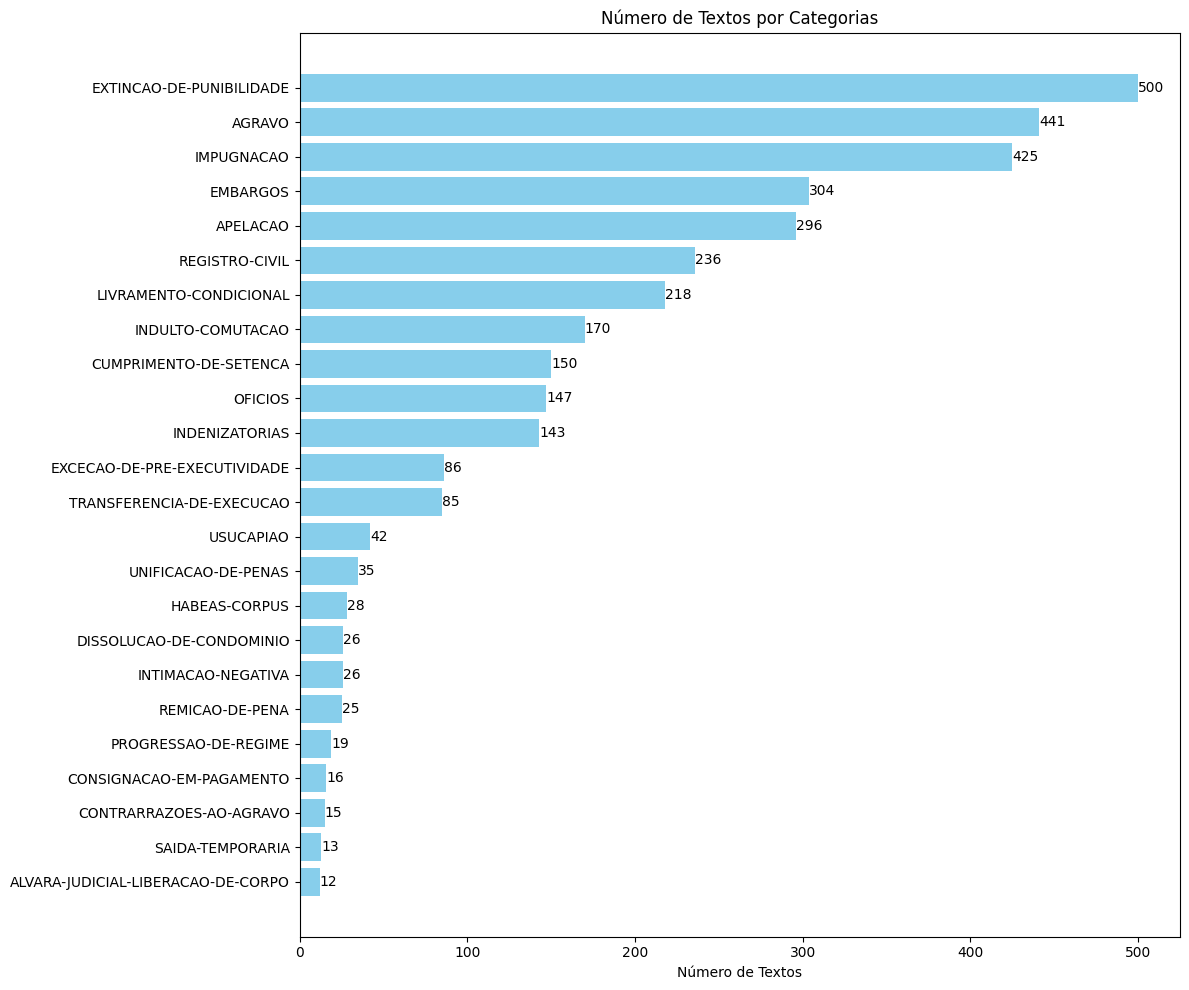

In [65]:
import matplotlib.pyplot as plt

# Plotar um gráfico de barras horizontal ordenado do maior para o menor
def plot_sorted_horizontal_bar_chart(categories, counts):
    # Ordena as categorias e as contagens do maior para o menor
    categories_counts = sorted(zip(categories, counts), key=lambda x: x[1], reverse=True)
    sorted_categories, sorted_counts = zip(*categories_counts)

    plt.figure(figsize=(12, 10))  # Tamanho ajustado para acomodar todas as barras
    y_pos = range(len(sorted_categories))
    plt.barh(y_pos, sorted_counts, color='skyblue')
    plt.yticks(y_pos, sorted_categories)
    plt.xlabel('Número de Textos')
    plt.title('Número de Textos por Categorias')

    # Adicionar o número de textos ao lado de cada barra
    for i, v in enumerate(sorted_counts):
        plt.text(v, i, str(v), color='black', va='center')

    plt.tight_layout()
    plt.gca().invert_yaxis()  # Inverter para que a maior barra apareça no topo
    plt.show()

# Dados para o gráfico
categories = list(class_statistics.keys())
counts = [stats['num_texts'] for stats in class_statistics.values()]

# Chamar a função para plotar o gráfico
plot_sorted_horizontal_bar_chart(categories, counts)

In [66]:
from sklearn.model_selection import train_test_split

# Dividir os conjuntos de treinamento, validação e teste
# text_ids e att_masks são divididos de acordo com os rótulos (labels) usando train_test_split
train_x, test_val_x, train_y, test_val_y = train_test_split(text_ids, labels, random_state=111, test_size=0.2)
train_m, test_val_m = train_test_split(att_masks, random_state=111, test_size=0.2)

# O conjunto de teste e validação é dividido ao meio a partir do conjunto test_val_x e test_val_y
test_x, val_x, test_y, val_y = train_test_split(test_val_x, test_val_y, random_state=111, test_size=0.5)
test_m, val_m = train_test_split(test_val_m, random_state=111, test_size=0.5)

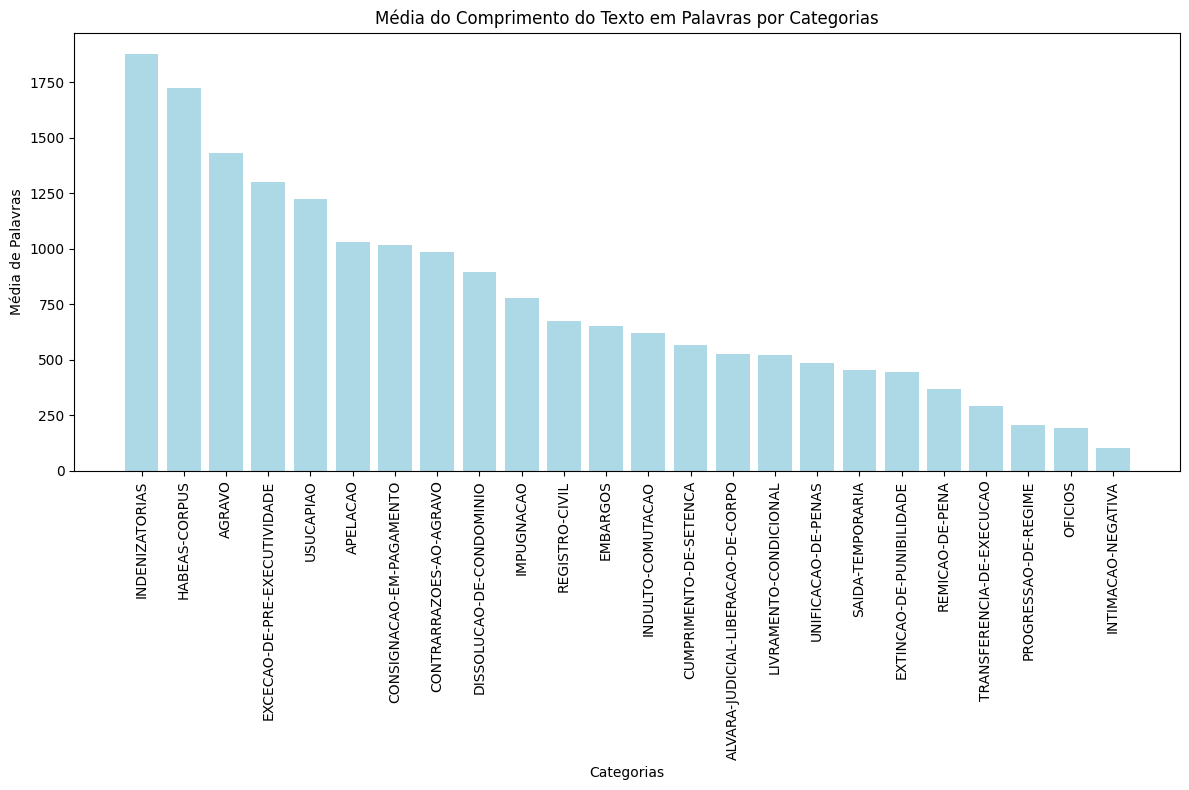

In [67]:
# Plotar um gráfico de barras para a média do comprimento do texto em palavras por categoria
def plot_average_words_bar_chart(statistics_dict):
    # Extrair categorias e médias de comprimento de texto
    categories = [category for category in statistics_dict.keys()]
    avg_lengths = [stats['avg_text_length'] for stats in statistics_dict.values()]

    # Ordenar os dados pelo valor médio de comprimento
    sorted_categories_lengths = sorted(zip(categories, avg_lengths), key=lambda x: x[1], reverse=True)
    sorted_categories, sorted_avg_lengths = zip(*sorted_categories_lengths)

    plt.figure(figsize=(12, 8))
    plt.bar(sorted_categories, sorted_avg_lengths, color='lightblue')
    plt.xlabel('Categorias')
    plt.ylabel('Média de Palavras')
    plt.title('Média do Comprimento do Texto em Palavras por Categorias')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Chamar a função para plotar o gráfico
plot_average_words_bar_chart(class_statistics)

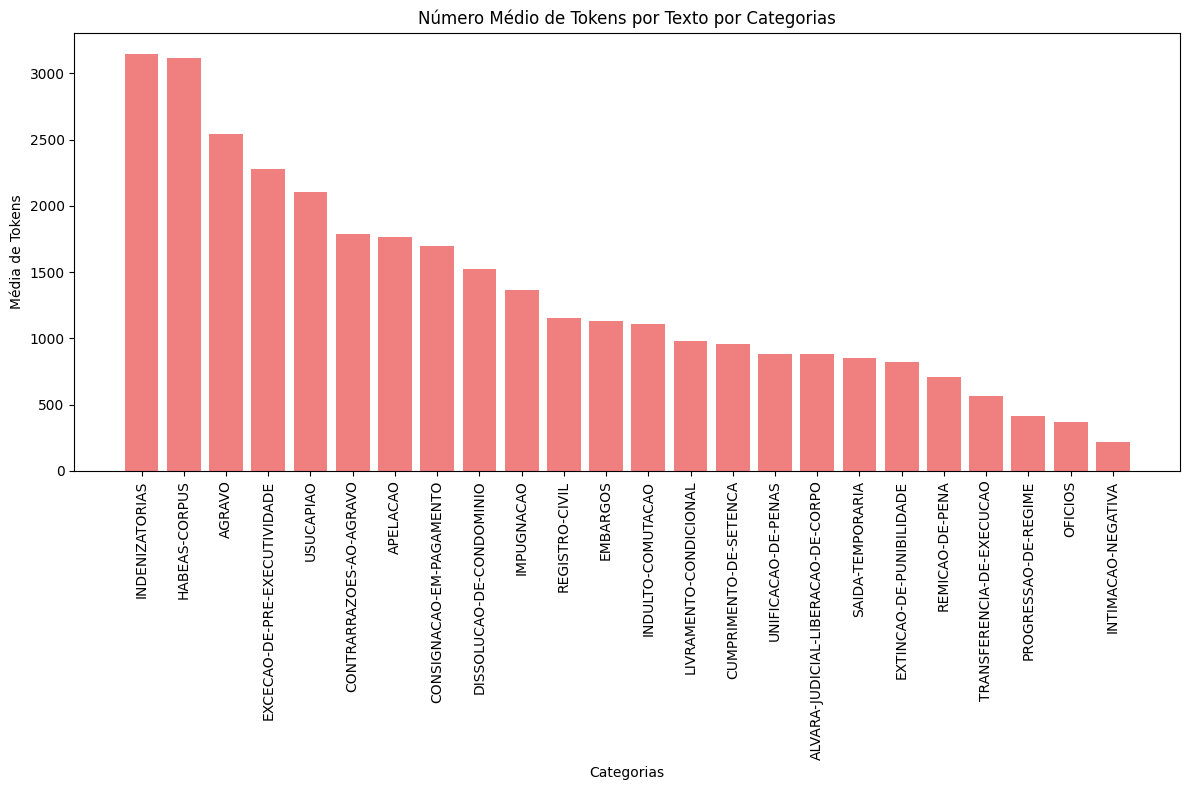

In [68]:
# Plotar um gráfico de barras para o número médio de tokens por texto por categoria
def plot_average_tokens_bar_chart(statistics_dict):
    # Extrair categorias e médias de número de tokens
    categories = [category for category in statistics_dict.keys()]
    avg_tokens = [stats['avg_token_count'] for stats in statistics_dict.values()]

    # Ordenar os dados pelo valor médio de número de tokens
    sorted_categories_tokens = sorted(zip(categories, avg_tokens), key=lambda x: x[1], reverse=True)
    sorted_categories, sorted_avg_tokens = zip(*sorted_categories_tokens)

    plt.figure(figsize=(12, 8))
    plt.bar(sorted_categories, sorted_avg_tokens, color='lightcoral')
    plt.xlabel('Categorias')
    plt.ylabel('Média de Tokens')
    plt.title('Número Médio de Tokens por Texto por Categorias')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Chamar a função para plotar o gráfico
plot_average_tokens_bar_chart(class_statistics)

In [69]:
import numpy as np

# Verificar as dimensões das variáveis

print("Dimensões de train_x:", np.array(train_x).shape)
print("Dimensões de train_y:", np.array(train_y).shape)

print("Dimensões de test_x:", np.array(test_x).shape)
print("Dimensões de test_y:", np.array(test_y).shape)

print("Dimensões de val_x:", np.array(val_x).shape)
print("Dimensões de val_y:", np.array(val_y).shape)

print("Dimensões de train_m:", np.array(train_m).shape)
print("Dimensões de test_val_m:", np.array(test_val_m).shape)

Dimensões de train_x: (2766, 512)
Dimensões de train_y: (2766,)
Dimensões de test_x: (346, 512)
Dimensões de test_y: (346,)
Dimensões de val_x: (346, 512)
Dimensões de val_y: (346,)
Dimensões de train_m: (2766, 512)
Dimensões de test_val_m: (692, 512)


In [70]:
import torch

# Converter os dados para tensores PyTorch e exibir tamanhos

# Converter para tensores PyTorch
train_x = torch.tensor(train_x)
test_x = torch.tensor(test_x)
val_x = torch.tensor(val_x)
train_y = torch.tensor(train_y)
test_y = torch.tensor(test_y)
val_y = torch.tensor(val_y)
train_m = torch.tensor(train_m)
test_m = torch.tensor(test_m)
val_m = torch.tensor(val_m)

# Exibir tamanhos dos tensores
print("Train x shape:", train_x.shape)
print("Test x shape:", test_x.shape)
print("Validation x shape:", val_x.shape)
print("Train y shape:", train_y.shape)
print("Test y shape:", test_y.shape)
print("Validation y shape:", val_y.shape)
print("Train mask shape:", train_m.shape)
print("Test mask shape:", test_m.shape)
print("Validation mask shape:", val_m.shape)

Train x shape: torch.Size([2766, 512])
Test x shape: torch.Size([346, 512])
Validation x shape: torch.Size([346, 512])
Train y shape: torch.Size([2766])
Test y shape: torch.Size([346])
Validation y shape: torch.Size([346])
Train mask shape: torch.Size([2766, 512])
Test mask shape: torch.Size([346, 512])
Validation mask shape: torch.Size([346, 512])


In [71]:
# Criar o DataLoader para os conjuntos de treinamento e validação
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Definir o tamanho do lote (batch_size)
batch_size = 32

# Criar TensorDataset para os conjuntos de treinamento e validação
train_data = TensorDataset(train_x, train_m, train_y)
val_data = TensorDataset(val_x, val_m, val_y)

# Criar RandomSampler para o conjunto de treinamento e SequentialSampler para o conjunto de validação
train_sampler = RandomSampler(train_data)
val_sampler = SequentialSampler(val_data)

# Criar DataLoader para os conjuntos de treinamento e validação
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

In [72]:
# labels é o vetor com os rótulos (ex: df['issue_area_label'].values)
max_label = max(labels)
num_labels = max_label + 1

In [73]:
# Carregar o modelo xlm-roberta-base para classificação de sequências
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.optim import AdamW

tokenizer = AutoTokenizer.from_pretrained('xlm-roberta-base')
model = AutoModelForSequenceClassification.from_pretrained(
    'xlm-roberta-base',
    num_labels=num_labels,
    output_attentions=False,
    output_hidden_states=False
)

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [74]:
# Determinar o dispositivo disponível (GPU se disponível, caso contrário, CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Dispositivo de treinamento:", device)

# Mover o modelo para o dispositivo especificado
model = model.to(device)

Dispositivo de treinamento: cuda


In [75]:
# Função para contar os parâmetros treináveis do modelo
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

# Exibir o número de parâmetros treináveis e detalhes do modelo
print('Número de parâmetros treináveis:', count_parameters(model), '\n', model)

Número de parâmetros treináveis: 278062873 
 XLMRobertaForSequenceClassification(
  (roberta): XLMRobertaModel(
    (embeddings): XLMRobertaEmbeddings(
      (word_embeddings): Embedding(250002, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): XLMRobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x XLMRobertaLayer(
          (attention): XLMRobertaAttention(
            (self): XLMRobertaSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): XLMRobertaSelfOutput(
              (

In [76]:
# Listar os nomes dos parâmetros do modelo
[n for n, p in model.named_parameters()]

['roberta.embeddings.word_embeddings.weight',
 'roberta.embeddings.position_embeddings.weight',
 'roberta.embeddings.token_type_embeddings.weight',
 'roberta.embeddings.LayerNorm.weight',
 'roberta.embeddings.LayerNorm.bias',
 'roberta.encoder.layer.0.attention.self.query.weight',
 'roberta.encoder.layer.0.attention.self.query.bias',
 'roberta.encoder.layer.0.attention.self.key.weight',
 'roberta.encoder.layer.0.attention.self.key.bias',
 'roberta.encoder.layer.0.attention.self.value.weight',
 'roberta.encoder.layer.0.attention.self.value.bias',
 'roberta.encoder.layer.0.attention.output.dense.weight',
 'roberta.encoder.layer.0.attention.output.dense.bias',
 'roberta.encoder.layer.0.attention.output.LayerNorm.weight',
 'roberta.encoder.layer.0.attention.output.LayerNorm.bias',
 'roberta.encoder.layer.0.intermediate.dense.weight',
 'roberta.encoder.layer.0.intermediate.dense.bias',
 'roberta.encoder.layer.0.output.dense.weight',
 'roberta.encoder.layer.0.output.dense.bias',
 'roberta.en

In [77]:
# Taxa de aprendizado e epsilon
learning_rate = 1e-5
adam_epsilon = 1e-8

# Lista de parâmetros que não sofrem decaimento (no_decay)
no_decay = ['bias', 'LayerNorm.weight']

# Configuração dos parâmetros e taxas de decaimento para o otimizador
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.2},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.0}
]

# Configuração do otimizador AdamW
optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate, eps=adam_epsilon)

In [78]:
# Configurar o agendador de taxa de aprendizado (scheduler)
from transformers import get_linear_schedule_with_warmup

# Número de épocas e passos totais
num_epochs = 10
total_steps = len(train_dataloader) * num_epochs

# Configuração do agendador de taxa de aprendizado com aquecimento linear
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

In [79]:
# Função para calcular o tempo decorrido entre dois momentos
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [80]:
# Configurar sementes aleatórias para reprodutibilidade
import numpy as np
import random

# Definir uma semente fixa para garantir reprodutibilidade
seed_val = 111

# Configurar sementes para bibliotecas aleatórias e PyTorch
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

In [81]:
import torch
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from torch.utils.data import DataLoader, TensorDataset
import time
import pandas as pd
import os

# Função para calcular previsões e rótulos verdadeiros
def get_predictions_and_labels(model, dataloader, device):
    model.eval()
    predictions = []
    true_labels = []

    with torch.no_grad():
        for batch in dataloader:
            batch = tuple(tensor.to(device) for tensor in batch)
            inputs, attention_masks, labels = batch
            outputs = model(inputs, attention_mask=attention_masks)
            logits = outputs[0].detach().cpu().numpy()
            label_ids = labels.to('cpu').numpy()
            predictions.extend(np.argmax(logits, axis=1).flatten())
            true_labels.extend(label_ids.flatten())

    return predictions, true_labels

# Função para calcular o tempo de uma época
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

# Convertendo os dados de teste para tensores do PyTorch
test_inputs_tensor = torch.tensor(test_x, dtype=torch.long)
test_masks_tensor = torch.tensor(test_m, dtype=torch.long)
test_labels_tensor = torch.tensor(test_y, dtype=torch.long)

# Criando o Dataset e DataLoader para o conjunto de teste
test_data = TensorDataset(test_inputs_tensor, test_masks_tensor, test_labels_tensor)
test_data_loader = DataLoader(test_data, batch_size=batch_size)

# Inicializar listas para armazenar métricas
training_losses, training_accuracies = [], []
validation_losses, validation_accuracies = [], []
validation_precisions, validation_recalls, validation_f1_scores = [], [], []
training_precisions, training_recalls, training_f1_scores = [], [], []
test_accuracies, test_precisions, test_recalls, test_f1_scores, test_losses = [], [], [], [], []

# Diretório para salvar o melhor modelo
best_model_dir = "/content/drive/MyDrive/Colab Notebooks/Defesa final/Modelos BERT/FacebookAI xlm-roberta-base/Melhor-modelo"
os.makedirs(best_model_dir, exist_ok=True)

# Early Stopping: configurações
early_stopping_patience = 3
early_stopping_metric = 'val_loss'  # ou 'val_f1'
best_metric = float('inf') if early_stopping_metric == 'val_loss' else 0
patience_counter = 0

# Início do tempo total
total_start_time = time.time()

# Loop de treinamento
for epoch in range(num_epochs):
    start_time = time.time()
    train_loss, train_correct, train_total = 0, 0, 0
    train_predictions, train_true_labels = [], []

    model.train()
    for step, (mini_batch_x, mini_batch_m, mini_batch_y) in enumerate(train_dataloader):
        optimizer.zero_grad()
        mini_batch_x = mini_batch_x.to(device)
        mini_batch_m = mini_batch_m.to(device)
        mini_batch_y = mini_batch_y.to(device)

        outputs = model(mini_batch_x, attention_mask=mini_batch_m, labels=mini_batch_y)
        loss = outputs.loss
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs.logits, 1)
        train_total += mini_batch_y.size(0)
        train_correct += (predicted == mini_batch_y).sum().item()
        train_predictions.extend(predicted.detach().cpu().numpy())
        train_true_labels.extend(mini_batch_y.detach().cpu().numpy())

    train_loss /= len(train_dataloader)
    train_accuracy = 100 * train_correct / train_total
    training_losses.append(train_loss)
    training_accuracies.append(train_accuracy)

    train_precision, train_recall, train_f1, _ = precision_recall_fscore_support(
        train_true_labels, train_predictions, average='weighted', zero_division=0)
    training_precisions.append(train_precision)
    training_recalls.append(train_recall)
    training_f1_scores.append(train_f1)

    # Validação
    validation_loss, validation_correct, validation_total = 0, 0, 0
    validation_predictions, validation_true_labels = [], []
    model.eval()
    with torch.no_grad():
        for mini_batch_x, mini_batch_m, mini_batch_y in val_dataloader:
            mini_batch_x = mini_batch_x.to(device)
            mini_batch_m = mini_batch_m.to(device)
            mini_batch_y = mini_batch_y.to(device)

            outputs = model(mini_batch_x, attention_mask=mini_batch_m, labels=mini_batch_y)
            loss = outputs.loss
            validation_loss += loss.item()
            _, predicted = torch.max(outputs.logits, 1)
            validation_total += mini_batch_y.size(0)
            validation_correct += (predicted == mini_batch_y).sum().item()
            validation_predictions.extend(predicted.detach().cpu().numpy())
            validation_true_labels.extend(mini_batch_y.detach().cpu().numpy())

    validation_loss /= len(val_dataloader)
    validation_accuracy = 100 * validation_correct / validation_total
    validation_losses.append(validation_loss)
    validation_accuracies.append(validation_accuracy)

    validation_precision, validation_recall, validation_f1, _ = precision_recall_fscore_support(
        validation_true_labels, validation_predictions, average='weighted', zero_division=0)
    validation_precisions.append(validation_precision)
    validation_recalls.append(validation_recall)
    validation_f1_scores.append(validation_f1)

    # Teste
    test_loss = 0
    test_predictions, test_true_labels = get_predictions_and_labels(model, test_data_loader, device)
    with torch.no_grad():
        for mini_batch_x, mini_batch_m, mini_batch_y in test_data_loader:
            mini_batch_x = mini_batch_x.to(device)
            mini_batch_m = mini_batch_m.to(device)
            mini_batch_y = mini_batch_y.to(device)
            outputs = model(mini_batch_x, attention_mask=mini_batch_m, labels=mini_batch_y)
            loss = outputs.loss
            test_loss += loss.item()

    test_loss /= len(test_data_loader)
    test_losses.append(test_loss)

    test_accuracy = accuracy_score(test_true_labels, test_predictions)
    test_precision, test_recall, test_f1, _ = precision_recall_fscore_support(
        test_true_labels, test_predictions, average='weighted', zero_division=0)
    test_accuracies.append(test_accuracy)
    test_precisions.append(test_precision)
    test_recalls.append(test_recall)
    test_f1_scores.append(test_f1)

    # Early Stopping com salvamento do melhor modelo
    current_metric = validation_loss if early_stopping_metric == 'val_loss' else validation_f1
    improved = current_metric < best_metric if early_stopping_metric == 'val_loss' else current_metric > best_metric

    if improved:
        best_metric = current_metric
        patience_counter = 0
        # Salvar melhor modelo
        model_to_save = model.module if hasattr(model, 'module') else model
        model_to_save.save_pretrained(best_model_dir)
        tokenizer.save_pretrained(best_model_dir)
        print(f"Melhor modelo salvo (epoch {epoch+1}) com {early_stopping_metric} = {current_metric:.4f}")
    else:
        patience_counter += 1

    if patience_counter >= early_stopping_patience:
        print(f"\nEarly stopping ativado após {epoch+1} épocas sem melhoria de '{early_stopping_metric}'.")
        break

    # Imprimir métricas
    epoch_mins, epoch_secs = epoch_time(start_time, time.time())
    print(f'\nEpoch {epoch+1}/{num_epochs}')
    print(f'Train Loss: {train_loss:.6f} | Accuracy: {train_accuracy:.2f}% | F1: {train_f1:.4f}')
    print(f'Validation Loss: {validation_loss:.6f} | Accuracy: {validation_accuracy:.2f}% | F1: {validation_f1:.4f}')
    print(f'Test Loss: {test_loss:.6f} | Accuracy: {test_accuracy:.2f}% | F1: {test_f1:.4f}')
    print(f'Duração da época: {epoch_mins}m {epoch_secs}s\n' + '-'*100)

# Tempo total
total_end_time = time.time()
total_mins, total_secs = epoch_time(total_start_time, total_end_time)
print(f'\nTempo total de treinamento: {total_mins}m {total_secs}s')

<ipython-input-81-1315029965>:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_inputs_tensor = torch.tensor(test_x, dtype=torch.long)
<ipython-input-81-1315029965>:36: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_masks_tensor = torch.tensor(test_m, dtype=torch.long)
<ipython-input-81-1315029965>:37: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_labels_tensor = torch.tensor(test_y, dtype=torch.long)


Melhor modelo salvo (epoch 1) com val_loss = 2.4318

Epoch 1/10
Train Loss: 2.758067 | Accuracy: 21.37% | F1: 0.1371
Validation Loss: 2.431790 | Accuracy: 30.06% | F1: 0.1758
Test Loss: 2.420101 | Accuracy: 0.32% | F1: 0.1873
Duração da época: 1m 1s
----------------------------------------------------------------------------------------------------
Melhor modelo salvo (epoch 2) com val_loss = 1.8063

Epoch 2/10
Train Loss: 2.063856 | Accuracy: 44.61% | F1: 0.3272
Validation Loss: 1.806334 | Accuracy: 44.80% | F1: 0.3223
Test Loss: 1.826928 | Accuracy: 0.44% | F1: 0.3103
Duração da época: 1m 3s
----------------------------------------------------------------------------------------------------
Melhor modelo salvo (epoch 3) com val_loss = 1.6922

Epoch 3/10
Train Loss: 1.666186 | Accuracy: 51.41% | F1: 0.4038
Validation Loss: 1.692172 | Accuracy: 50.58% | F1: 0.4153
Test Loss: 1.687206 | Accuracy: 0.49% | F1: 0.4010
Duração da época: 1m 0s
------------------------------------------------

In [82]:
import pandas as pd

# Convertendo métricas de acurácia, precisão, recall e F1-Score para porcentagem
metrics_df = pd.DataFrame({
    'Epoch': range(1, num_epochs + 1),
    'Training Loss': training_losses,
    'Training Accuracy': [acc * 100 for acc in training_accuracies],  # Convertendo para porcentagem
    'Training Precision': [prec * 100 for prec in training_precisions],  # Convertendo para porcentagem
    'Training Recall': [rec * 100 for rec in training_recalls],  # Convertendo para porcentagem
    'Training F1-Score': [f1 * 100 for f1 in training_f1_scores],  # Convertendo para porcentagem
    'Validation Loss': validation_losses,
    'Validation Accuracy': [acc * 100 for acc in validation_accuracies],  # Convertendo para porcentagem
    'Validation Precision': [prec * 100 for prec in validation_precisions],  # Convertendo para porcentagem
    'Validation Recall': [rec * 100 for rec in validation_recalls],  # Convertendo para porcentagem
    'Validation F1-Score': [f1 * 100 for f1 in validation_f1_scores],  # Convertendo para porcentagem
    'Test Loss': test_losses,
    'Test Accuracy': [acc * 100 for acc in test_accuracies],  # Convertendo para porcentagem
    'Test Precision': [prec * 100 for prec in test_precisions],  # Convertendo para porcentagem
    'Test Recall': [rec * 100 for rec in test_recalls],  # Convertendo para porcentagem
    'Test F1-Score': [f1 * 100 for f1 in test_f1_scores]  # Convertendo para porcentagem
})

# Especifique o caminho onde você deseja salvar o arquivo CSV
csv_file_path = '/content/drive/MyDrive/Colab Notebooks/Defesa final/Modelos BERT/FacebookAI xlm-roberta-base/Training-Metrics/training_metrics.csv'

# Salvar o DataFrame em um arquivo CSV
metrics_df.to_csv(csv_file_path, index=False)

# Verificar se o arquivo foi salvo com sucesso
print(f"Metrics saved to: {csv_file_path}")

Metrics saved to: /content/drive/MyDrive/Colab Notebooks/Defesa final/Modelos BERT/FacebookAI xlm-roberta-base/Training-Metrics/training_metrics.csv


In [83]:
# Verificar o uso de GPU
if torch.cuda.is_available():
    gpu_memory_allocated = torch.cuda.memory_allocated(0) / 1024.0 / 1024.0  # Em megabytes
    gpu_memory_reserved = torch.cuda.memory_reserved(0) / 1024.0 / 1024.0  # Em megabytes
    print(f'Memória da GPU Alocada: {gpu_memory_allocated:.2f} MB')
    print(f'Memória da GPU Reservada: {gpu_memory_reserved:.2f} MB')

Memória da GPU Alocada: 4279.81 MB
Memória da GPU Reservada: 14246.00 MB


In [84]:
# Salvar o modelo treinado, tokenizer e perdas em arquivos
import pickle
import os

# Diretório de saída para salvar os arquivos
out_dir = '/content/drive/MyDrive/Colab Notebooks/Defesa final/Modelos BERT/FacebookAI xlm-roberta-base/Modelo-treinado-tokenizer-e-perdas-em-arquivos'

# Criar o diretório se não existir
if not os.path.exists(out_dir):
    os.makedirs(out_dir)

# Salvar o modelo treinado e o tokenizer
model_to_save = model.module if hasattr(model, 'module') else model
model_to_save.save_pretrained(out_dir)
tokenizer.save_pretrained(out_dir)

# Salvar as perdas de treinamento e validação em arquivos pickle
with open(out_dir + '/train_losses.pkl', 'wb') as f:
    pickle.dump(training_losses, f)

with open(out_dir + '/val_losses.pkl', 'wb') as f:
    pickle.dump(validation_losses, f)

In [85]:
# Carregar modelo treinado, tokenizer e perdas a partir dos arquivos salvos
out_dir = '/content/drive/MyDrive/Colab Notebooks/Defesa final/Modelos BERT/FacebookAI xlm-roberta-base/Modelo-treinado-tokenizer-e-perdas-em-arquivos'

# Carregar o modelo treinado
model = AutoModelForSequenceClassification.from_pretrained(out_dir)

# Configurar o dispositivo (GPU se disponível, caso contrário, CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Carregar as perdas de treinamento e validação a partir dos arquivos pickle
with open(out_dir + '/train_losses.pkl', 'rb') as f:
    train_losses = pickle.load(f)

with open(out_dir + '/val_losses.pkl', 'rb') as f:
    val_losses = pickle.load(f)

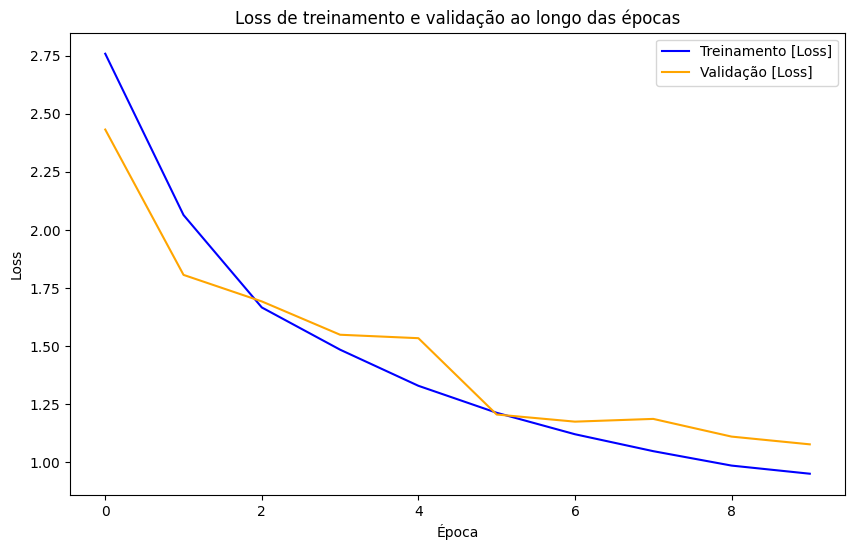

In [86]:
# Plotar as perdas de treinamento e validação ao longo das épocas
from matplotlib import pyplot as plt
%matplotlib inline

# Plotar train_losses e val_losses no mesmo gráfico
plt.figure(figsize=(10, 6))

plt.plot(train_losses, label='Treinamento [Loss]', color='blue')
plt.plot(val_losses, label='Validação [Loss]', color='orange')

plt.title('Loss de treinamento e validação ao longo das épocas')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [87]:
# Avaliar o modelo no conjunto de teste
batch_size = 32

# Criar um conjunto de dados de teste
test_data = TensorDataset(test_x, test_m)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

outputs = []

# Desativar gradientes para economizar memória e acelerar a inferência
with torch.no_grad():
    model.eval()

    # Loop através dos lotes de teste
    for k, (mb_x, mb_m) in enumerate(test_dataloader):
        mb_x = mb_x.to(device)
        mb_m = mb_m.to(device)

        # Obter saída do modelo
        output = model(mb_x, attention_mask=mb_m)

        # Adicionar a saída ao tensor de resultados
        outputs.append(output[0].to('cpu'))

# Concatenar os resultados em um único tensor
outputs = torch.cat(outputs)

In [88]:
# Calcular as previsões do modelo no conjunto de teste
_, predicted_values = torch.max(outputs, 1)
predicted_values = predicted_values.numpy()
true_values = test_y.numpy()

In [89]:
# Calcular e imprimir a acurácia do modelo no conjunto de teste
test_accuracy = np.sum(predicted_values == true_values) / len(true_values)
print("Precisão do teste:", test_accuracy)

Precisão do teste: 0.7398843930635838


In [90]:
true_values[:10]

array([14, 10,  9,  3, 19, 10,  8,  1, 13, 22])

In [91]:
predicted_values[:10]

array([14, 10,  9,  3, 19, 10,  8,  1, 13, 16])

In [92]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calcular métricas finais
test_accuracy = accuracy_score(true_values, predicted_values)
test_precision = precision_score(true_values, predicted_values, average='weighted', zero_division=0)
test_recall = recall_score(true_values, predicted_values, average='weighted', zero_division=0)
test_f1 = f1_score(true_values, predicted_values, average='weighted', zero_division=0)

# Exibir métricas com 2 casas decimais
print(f"\nMétricas Finais no Conjunto de Teste:")
print(f"Acurácia (Accuracy): {test_accuracy:.4f}")
print(f"Precisão (Precision): {test_precision:.4f}")
print(f"Revocação (Recall): {test_recall:.4f}")
print(f"F1-Score: {test_f1:.4f}")


Métricas Finais no Conjunto de Teste:
Acurácia (Accuracy): 0.7399
Precisão (Precision): 0.7114
Revocação (Recall): 0.7399
F1-Score: 0.7048


In [97]:
# Executar a inferência e coletar probabilidades
outputs = []
probs = []

with torch.no_grad():
    model.eval()

    for mb_x, mb_m in test_dataloader:
        mb_x = mb_x.to(device)
        mb_m = mb_m.to(device)

        output = model(mb_x, attention_mask=mb_m)
        logits = output.logits.cpu()

        outputs.append(logits)
        probs.append(torch.softmax(logits, dim=1).numpy())

outputs = torch.cat(outputs)
probs = np.concatenate(probs, axis=0)

# Gerar previsões
_, predicted_values = torch.max(outputs, 1)
predicted_values = predicted_values.numpy()

# Labels verdadeiros
true_values = test_y.numpy()

In [98]:
extra_metrics = compute_additional_metrics(true_values, predicted_values, probs)

for metric, value in extra_metrics.items():
    if value is not None:
        print(f"{metric}: {value:.4f}")
    else:
        print(f"{metric}: Não pôde ser calculado.")

MCC: 0.7162
AUC-ROC: 0.9636
AUC-PR: 0.8254


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_r

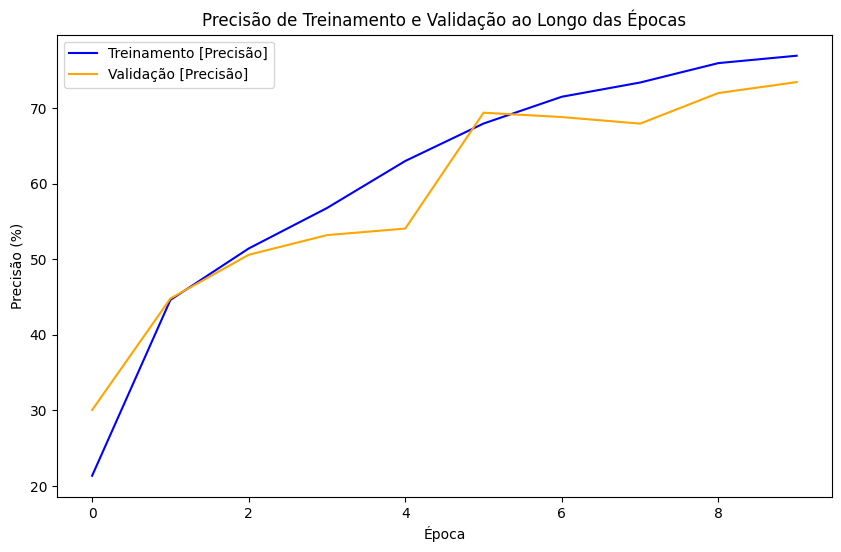

In [99]:
# Plotar as precisões de treinamento e validação
plt.figure(figsize=(10, 6))
plt.plot(training_accuracies, label='Treinamento [Precisão]', color='blue')
plt.plot(validation_accuracies, label='Validação [Precisão]', color='orange')
plt.title('Precisão de Treinamento e Validação ao Longo das Épocas')
plt.xlabel('Época')
plt.ylabel('Precisão (%)')
plt.legend()

In [100]:
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import numpy as np

# Lista de rótulos únicos e nomes de destino
unique_labels = df['issue_area_label'].unique()
target_names = df['issue_area'].unique()

# Ordenar target_names para que coincidam com os índices (labels) numéricos
target_names_ordered = [df[df['issue_area_label'] == label]['issue_area'].iloc[0] for label in unique_labels]

# Função para converter métricas para formato percentual
def convert_to_percentage(df):
    for metric in ['precision', 'recall', 'f1-score']:
        if metric in df.columns:
            df[metric] = df[metric].apply(lambda x: f'{x * 100:.2f}%' if isinstance(x, (int, float)) else x)
    return df

# -----------------------
# RELATÓRIO DE VALIDAÇÃO
# -----------------------
# Gerar dicionário do relatório de classificação
val_report_dict = classification_report(
    validation_true_labels, validation_predictions,
    labels=unique_labels,
    target_names=target_names,
    output_dict=True,
    zero_division=0
)

# Transformar dicionário em DataFrame
val_report_df = pd.DataFrame(val_report_dict).transpose()

# Converter valores de métricas para porcentagem (strings formatadas)
val_report_df = convert_to_percentage(val_report_df)

# Separar médias globais para colocar no final, se existirem
avg_rows_val = ['micro avg', 'macro avg', 'weighted avg']
available_avg_rows_val = val_report_df.index.intersection(avg_rows_val)
val_main = val_report_df[~val_report_df.index.isin(avg_rows_val)]
val_avgs = val_report_df.loc[available_avg_rows_val]
val_report_df = pd.concat([val_main, val_avgs])

# Ordenar por múltiplas métricas (do melhor para o pior)
val_report_df = val_report_df.sort_values(by=['f1-score', 'precision', 'recall'], ascending=[False, False, False], na_position='last')

# Exibir no console
print("Relatório de Classificação de Validação Ordenado:")
print(val_report_df)

# ------------------
# RELATÓRIO DE TESTE
# ------------------
test_report_dict = classification_report(
    true_values, predicted_values,
    labels=unique_labels,
    target_names=target_names,
    output_dict=True,
    zero_division=0
)

test_report_df = pd.DataFrame(test_report_dict).transpose()
test_report_df = convert_to_percentage(test_report_df)

# Separar médias globais para colocar no final, se existirem
avg_rows_test = ['micro avg', 'macro avg', 'weighted avg']
available_avg_rows_test = test_report_df.index.intersection(avg_rows_test)
test_main = test_report_df[~test_report_df.index.isin(avg_rows_test)]
test_avgs = test_report_df.loc[available_avg_rows_test]
test_report_df = pd.concat([test_main, test_avgs])

# Ordenar por métricas
test_report_df = test_report_df.sort_values(by=['f1-score', 'precision', 'recall'], ascending=[False, False, False], na_position='last')

print("\nRelatório de Classificação de Teste Ordenado:")
print(test_report_df)

# ----------------------
# ACURÁCIAS FINAIS
# ----------------------
val_accuracy = accuracy_score(validation_true_labels, validation_predictions)
test_accuracy = accuracy_score(true_values, predicted_values)

# Adicionar como nova linha no DataFrame (não formatado como porcentagem)
val_report_df.loc['accuracy'] = ''
val_report_df.at['accuracy', 'f1-score'] = f'{val_accuracy * 100:.2f}%'

test_report_df.loc['accuracy'] = ''
test_report_df.at['accuracy', 'f1-score'] = f'{test_accuracy * 100:.2f}%'

print("\nAcurácia para Validação:", val_accuracy)
print("Acurácia para Teste:", test_accuracy)

# ---------------------
# SALVAR COMO ARQUIVO
# ---------------------
val_csv_file_path = '/content/drive/MyDrive/Colab Notebooks/Defesa final/Modelos BERT/FacebookAI xlm-roberta-base/Relatório-de-classificação-para-validação/Val_Classification_Report.csv'
test_csv_file_path = '/content/drive/MyDrive/Colab Notebooks/Defesa final/Modelos BERT/FacebookAI xlm-roberta-base/Relatório-de-classificação-para-teste/Test_Classification_Report.csv'

val_report_df.to_csv(val_csv_file_path, index=True)
test_report_df.to_csv(test_csv_file_path, index=True)

print("\nRelatórios salvos em CSV:")
print("Validação:", val_csv_file_path)
print("Teste:", test_csv_file_path)

Relatório de Classificação de Validação Ordenado:
                                   precision   recall f1-score     support
APELACAO                              91.43%   91.43%   91.43%   35.000000
IMPUGNACAO                            96.88%   86.11%   91.18%   36.000000
REGISTRO-CIVIL                        80.00%  100.00%   88.89%   24.000000
AGRAVO                                87.76%   89.58%   88.66%   48.000000
CUMPRIMENTO-DE-SETENCA                88.89%   80.00%   84.21%   10.000000
INDENIZATORIAS                        69.23%   94.74%   80.00%   19.000000
EMBARGOS                              79.31%   79.31%   79.31%   29.000000
accuracy                              73.41%   73.41%   73.41%    0.734104
EXTINCAO-DE-PUNIBILIDADE              55.26%   93.33%   69.42%   45.000000
weighted avg                          66.37%   73.41%   68.56%  346.000000
OFICIOS                              100.00%   50.00%   66.67%   10.000000
LIVRAMENTO-CONDICIONAL                57.14%   61.

<ipython-input-100-2705879492>:85: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  val_report_df.loc['accuracy'] = ''
<ipython-input-100-2705879492>:88: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  test_report_df.loc['accuracy'] = ''


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


Resultados da validação cruzada:
Iteração 1: 0.5921
Iteração 2: 0.5848
Iteração 3: 0.6029
Iteração 4: 0.5704
Iteração 5: 0.5993
Iteração 6: 0.6029
Iteração 7: 0.5906
Iteração 8: 0.5978
Iteração 9: 0.6486
Iteração 10: 0.6232


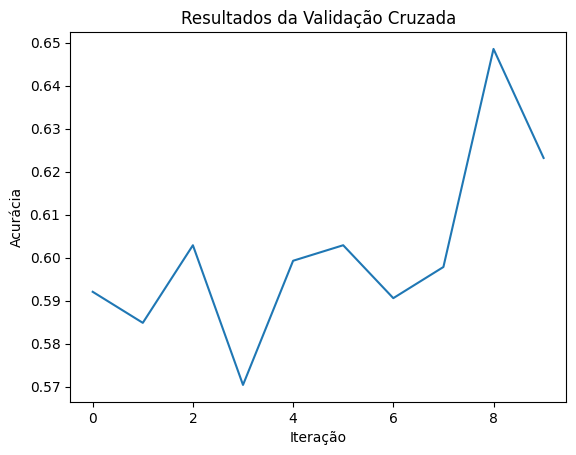

In [101]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Inicializar o classificador de RandomForest
classifier = RandomForestClassifier()

# Aplicar validação cruzada no conjunto de treinamento
scores = cross_val_score(classifier, train_x, train_y, cv=10)

# Imprimir os resultados
print("Resultados da validação cruzada:")
for i, score in enumerate(scores, 1):
    print(f"Iteração {i}: {score:.4f}")

# Plotar os resultados
plt.plot(scores)
plt.title('Resultados da Validação Cruzada')
plt.xlabel('Iteração')
plt.ylabel('Acurácia')
plt.show()

Matriz de confusão, sem normalização


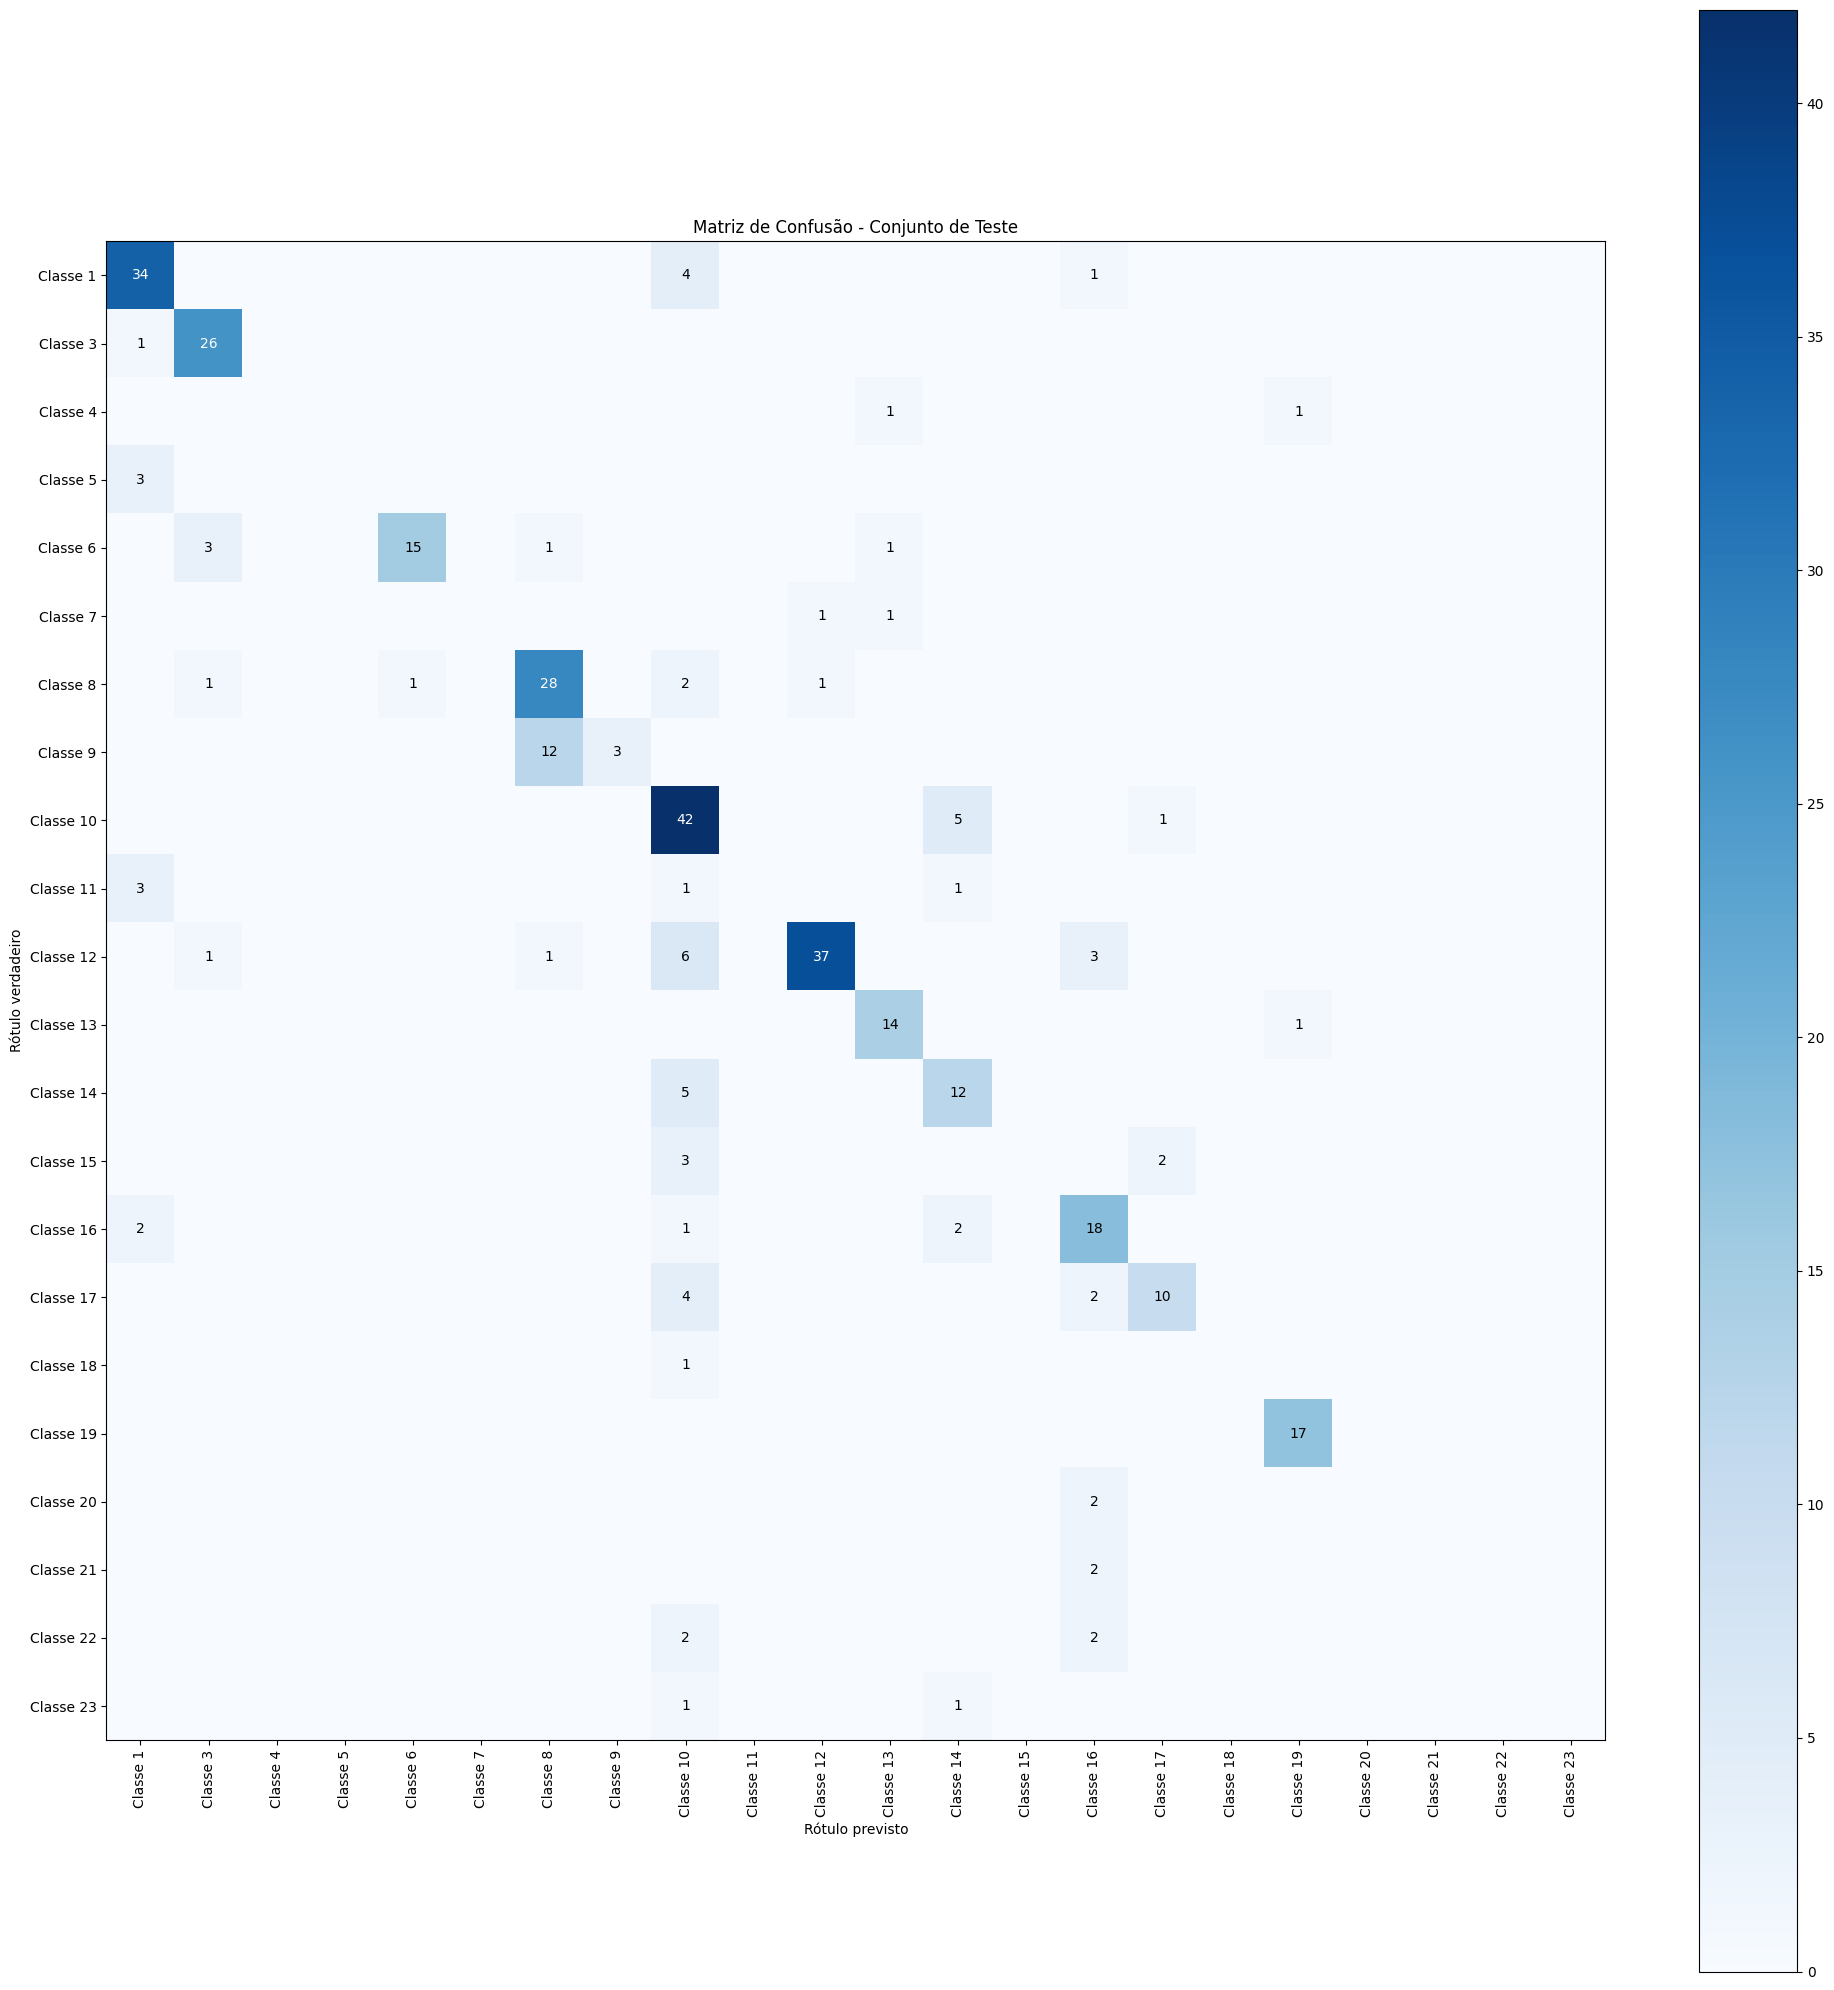

Matriz de confusão normalizada


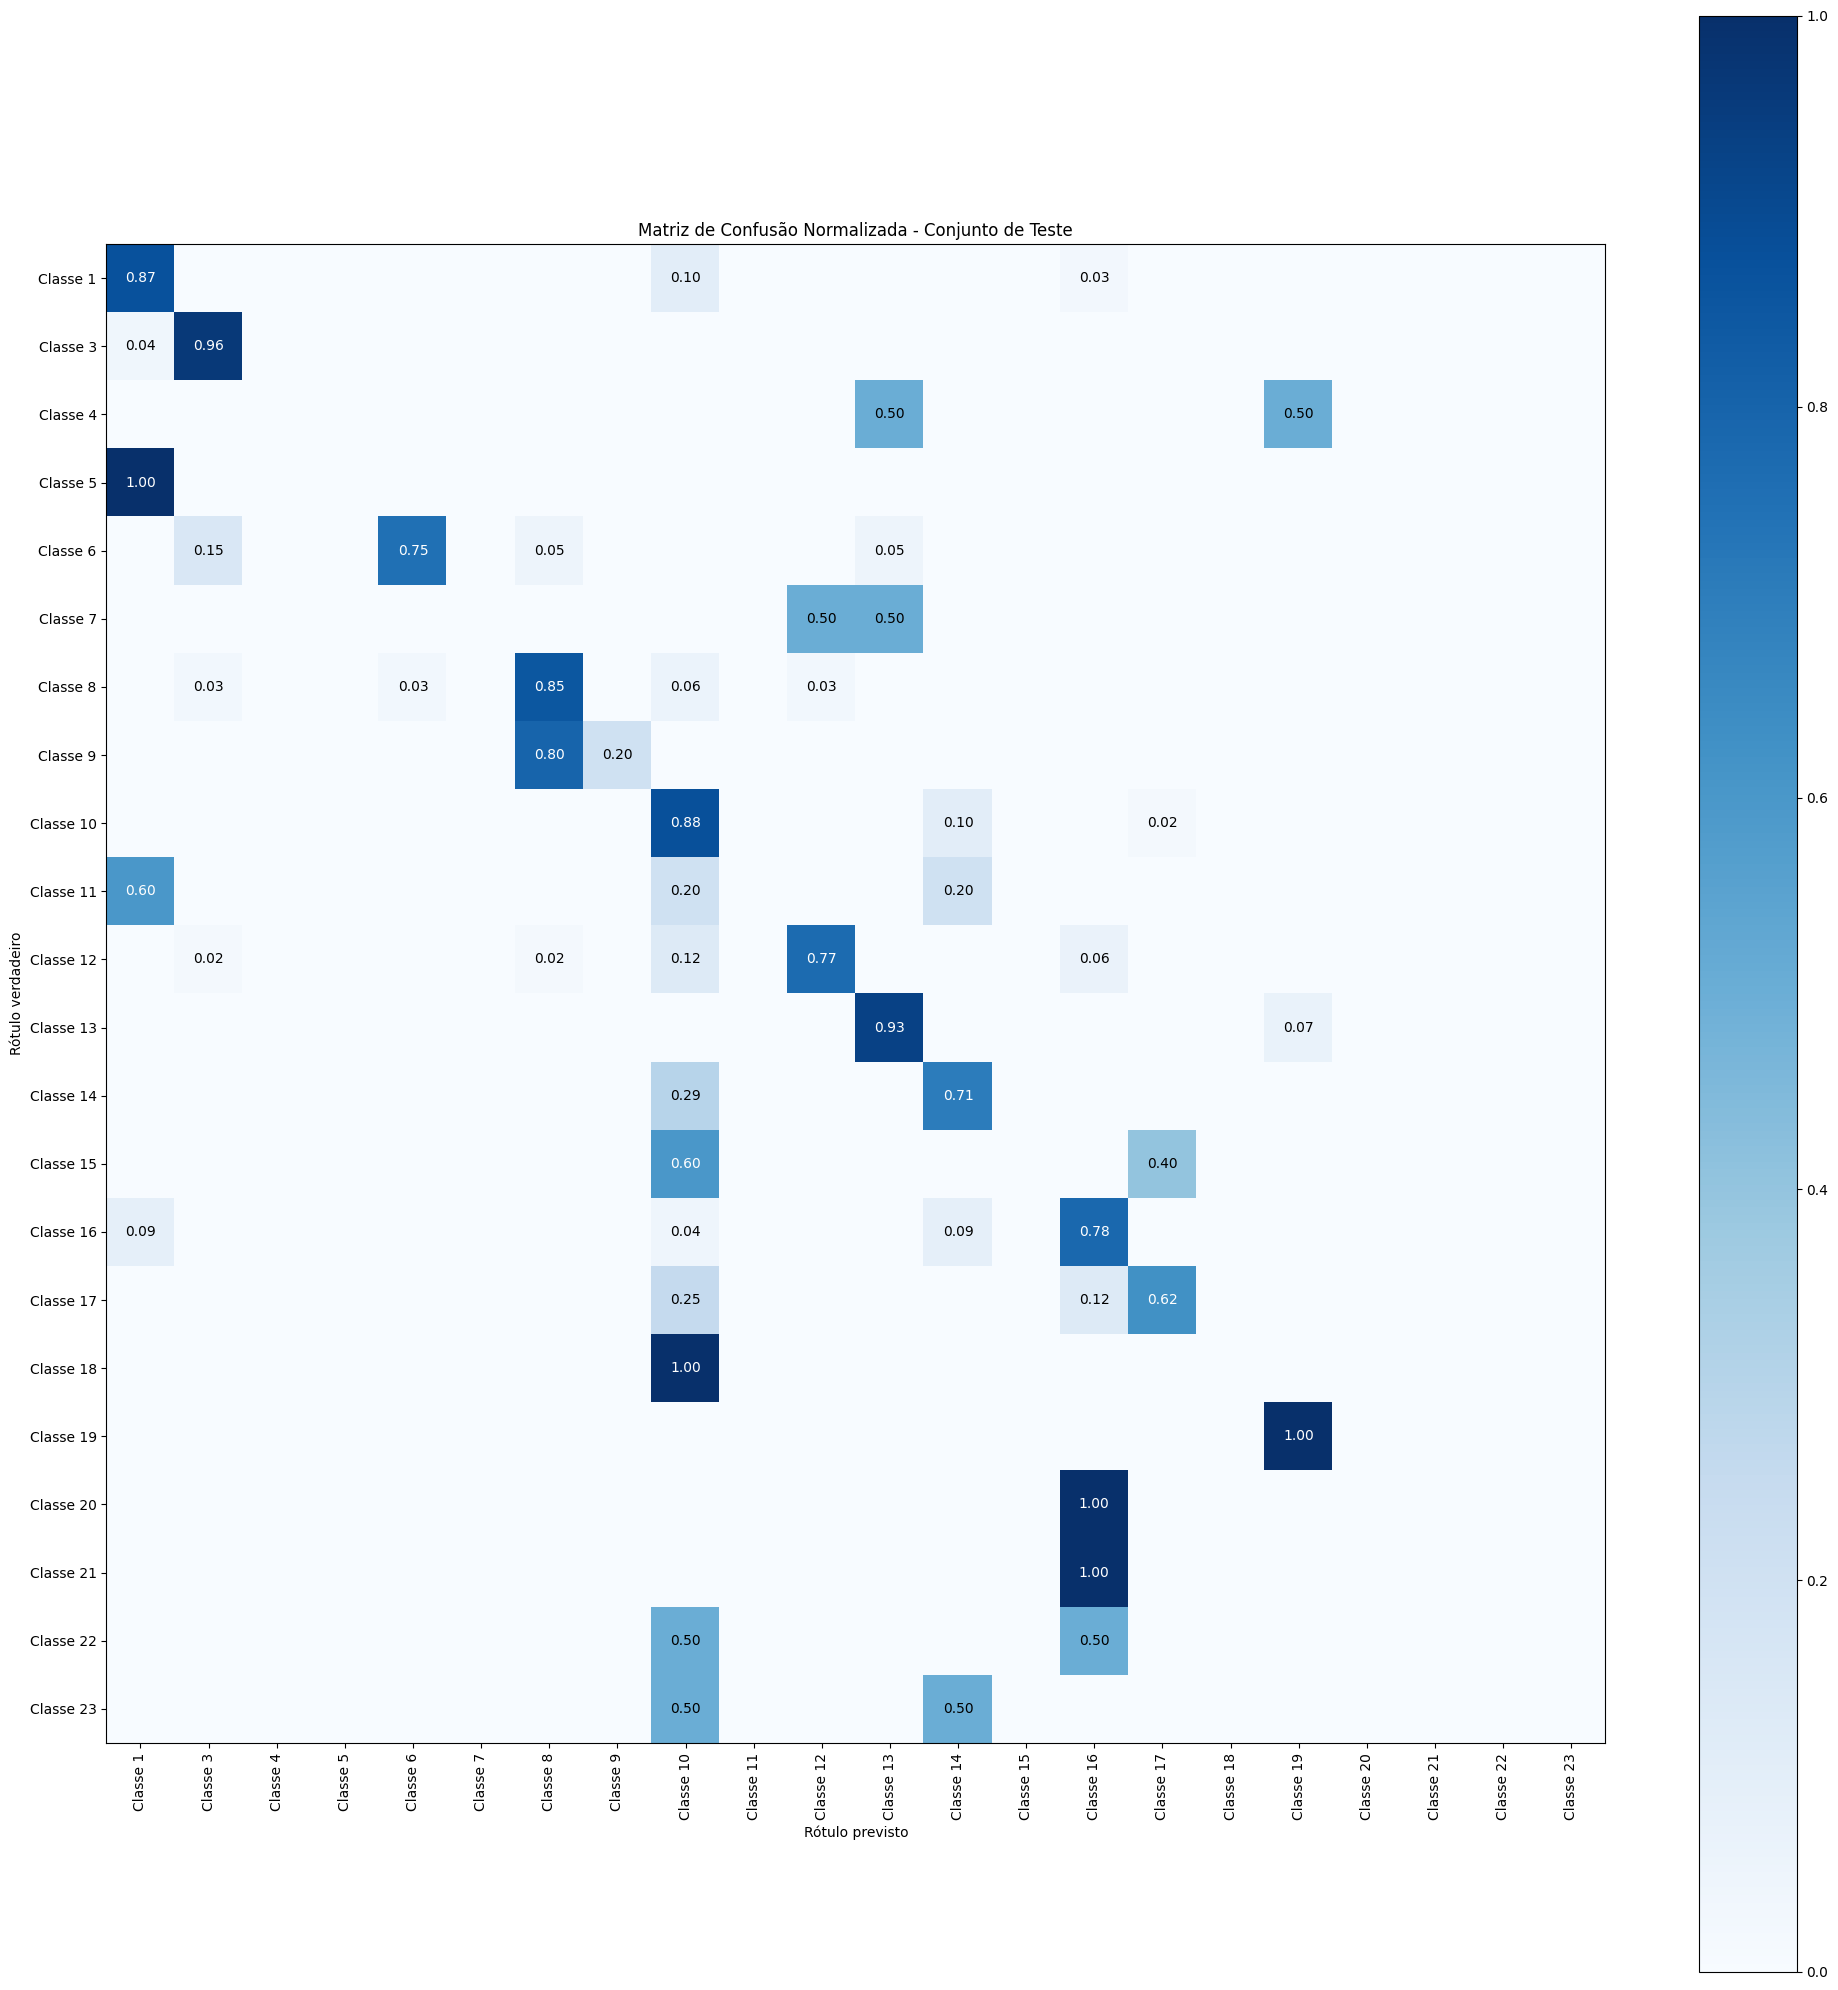

In [102]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes, normalize=False, title='Matriz de confusão', cmap=plt.cm.Blues):
    """
    Esta função imprime e plota a matriz de confusão.
    A normalização pode ser aplicada configurando `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusão normalizada")
    else:
        print('Matriz de confusão, sem normalização')

    plt.figure(figsize=(20, 20))  # Ajustar o tamanho da figura
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)  # Rotacionar os rótulos do eixo x para evitar sobreposição
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if cm[i, j] != 0:  # Somente anotar células com valores não-zero
            plt.text(j, i, format(cm[i, j], fmt),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Rótulo verdadeiro')
    plt.xlabel('Rótulo previsto')
    plt.tight_layout()  # Ajustar o layout da figura
    plt.show()  # Mostrar a figura

# Calcular a matriz de confusão real
cm_test = confusion_matrix(true_values, predicted_values)

# Obter os nomes das classes (substitua isso pelos nomes reais das suas classes)
unique_labels = np.unique(np.concatenate((true_values, predicted_values)))
target_names = ['Classe {}'.format(i) for i in unique_labels]

# Configurar opções de impressão para precisão de ponto flutuante
np.set_printoptions(precision=2)

# Plotar a matriz de confusão sem normalização
plot_confusion_matrix(cm_test, target_names, normalize=False, title='Matriz de Confusão - Conjunto de Teste')

# Plotar a matriz de confusão com normalização
plot_confusion_matrix(cm_test, target_names, normalize=True, title='Matriz de Confusão Normalizada - Conjunto de Teste')

You are using a model of type xlm-roberta to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at /content/drive/MyDrive/Colab Notebooks/Defesa final/Modelos BERT/FacebookAI xlm-roberta-base/Modelo-treinado-tokenizer-e-perdas-em-arquivos and are newly initialized: ['bert.embeddings.LayerNorm.bias', 'bert.embeddings.LayerNorm.weight', 'bert.embeddings.position_embeddings.weight', 'bert.embeddings.token_type_embeddings.weight', 'bert.embeddings.word_embeddings.weight', 'bert.encoder.layer.0.attention.output.LayerNorm.bias', 'bert.encoder.layer.0.attention.output.LayerNorm.weight', 'bert.encoder.layer.0.attention.output.dense.bias', 'bert.encoder.layer.0.attention.output.dense.weight', 'bert.encoder.layer.0.attention.self.key.bias', 'bert.encoder.layer.0.attention.self.key.weight', 'bert.encoder.layer.0.attention.self.query.bias', 'bert.


Métricas Consolidadas de Inferência do Modelo:
precision     0.020429
recall        0.068537
f1-score      0.009307
error_rate    0.931463
accuracy      0.068537
Name: weighted avg, dtype: float64

Relatório de Classificação por Categoria (Ordenado do Melhor para o Pior Resultado):
                                    precision    recall  f1-score  support
REMICAO-DE-PENA                      0.068406  1.000000  0.128052    236.0
HABEAS-CORPUS                        0.250000  0.004587  0.009009    218.0
EXTINCAO-DE-PUNIBILIDADE             0.000000  0.000000  0.000000    441.0
AGRAVO                               0.000000  0.000000  0.000000     12.0
APELACAO                             0.000000  0.000000  0.000000     15.0
REGISTRO-CIVIL                       0.000000  0.000000  0.000000    150.0
IMPUGNACAO                           0.000000  0.000000  0.000000    296.0
EMBARGOS                             0.000000  0.000000  0.000000     16.0
INDULTO-COMUTACAO                    0.00

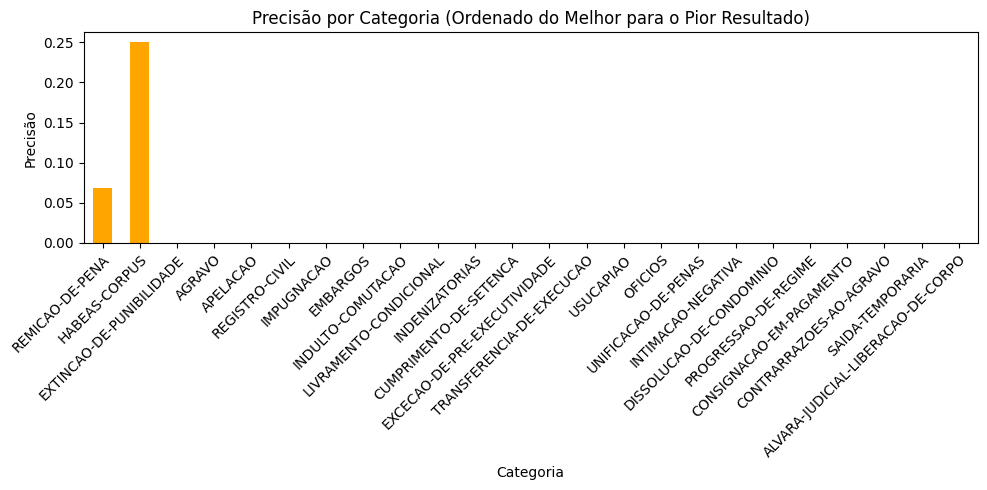

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForSequenceClassification
import torch
from sklearn.metrics import confusion_matrix, classification_report

# Configurações iniciais
model_path = '/content/drive/MyDrive/Colab Notebooks/Defesa final/Modelos BERT/FacebookAI xlm-roberta-base/Modelo-treinado-tokenizer-e-perdas-em-arquivos'
data_path = '/content/drive/MyDrive/Colab Notebooks/Defesa final/Modelos BERT/FacebookAI xlm-roberta-base/Dados/dataset-petitions-legal-br.csv'

# Carregar o modelo e o tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = BertForSequenceClassification.from_pretrained(model_path)
model.eval()
model.to('cuda')

# Carregar os dados
df = pd.read_csv(data_path)

# Mapear números de classes para nomes reais
class_names = {label: name for label, name in zip(df['issue_area_label'], df['issue_area'])}

# Listas para armazenar predições e categorias reais
predictions = []
real_categories = []

# Processar cada linha do DataFrame
for _, row in df.iterrows():
    text = row['facts']
    real_category = row['issue_area_label']

    inputs = tokenizer(text, return_tensors="pt", max_length=512, truncation=True, padding='max_length')
    inputs = {key: value.to('cuda') for key, value in inputs.items()}

    with torch.no_grad():
        outputs = model(**inputs)

    logits = outputs.logits.cpu()
    predicted_class = torch.argmax(torch.softmax(logits, dim=1), dim=1).item()

    predictions.append(predicted_class)
    real_categories.append(real_category)

# Gerar a matriz de confusão e calcular métricas de desempenho
confusion_mat = confusion_matrix(real_categories, predictions)
report = classification_report(real_categories, predictions, target_names=list(class_names.values()), output_dict=True)

# Converter o relatório em um DataFrame e realizar ajustes
report_df = pd.DataFrame(report).transpose()

# Calcular a taxa de erro global
accuracy = report_df.loc['accuracy', 'precision']  # A acurácia é o mesmo que a precisão para a métrica 'accuracy'
error_rate = 1 - accuracy

# Selecionar métricas relevantes para o relatório consolidado
relevant_metrics = ['precision', 'recall', 'f1-score']
weighted_avg_metrics = report_df.loc['weighted avg', relevant_metrics].copy()
weighted_avg_metrics['error_rate'] = error_rate
weighted_avg_metrics['accuracy'] = accuracy

# Exibir métricas consolidadas
print("\nMétricas Consolidadas de Inferência do Modelo:")
print(weighted_avg_metrics)

# Ordenar as classes de acordo com a pontuação F1 do melhor para o pior
sorted_report_all = report_df.drop(['accuracy', 'macro avg', 'weighted avg']).sort_values(by='f1-score', ascending=False)

# Exibir relatório de classificação por categoria
print("\nRelatório de Classificação por Categoria (Ordenado do Melhor para o Pior Resultado):")
print(sorted_report_all)

# Configurar opções de exibição do pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth', None)

# Imprimir o relatório formatado
print("Matriz de Confusão:")
print(confusion_mat)

# Precisão total do modelo
total_precision = accuracy  # Ajustado para usar a variável correta
print(f"\nPrecisão total do modelo: {total_precision:.2f}")

# Plotar gráficos de barras para a precisão de cada classe
def plot_precision_chart(data, title, color='skyblue'):
    plt.figure(figsize=(10, 5))
    data['precision'].plot(kind='bar', color=color)
    plt.title(title)
    plt.xlabel('Categoria')
    plt.ylabel('Precisão')
    plt.xticks(rotation=45, ha="right", rotation_mode="anchor")
    plt.tight_layout()
    plt.show()

# Gráfico para todas as categorias com resultados
plot_precision_chart(sorted_report_all, 'Precisão por Categoria (Ordenado do Melhor para o Pior Resultado)', color='orange')

# Salvar relatórios e matriz de confusão em CSV
confusion_df = pd.DataFrame(confusion_mat, index=class_names.values(), columns=class_names.values())
confusion_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Defesa final/Modelos BERT/FacebookAI xlm-roberta-base/Inferência/matriz_de_confusao.csv')
sorted_report_all.to_csv('/content/drive/MyDrive/Colab Notebooks/Defesa final/Modelos BERT/FacebookAI xlm-roberta-base/Inferência/relatorio_classificacao_categorias_com_resultados.csv')
weighted_avg_metrics.to_frame().T.to_csv('/content/drive/MyDrive/Colab Notebooks/Defesa final/Modelos BERT/FacebookAI xlm-roberta-base/Inferência/Inferência_gerais.csv')